# Please Don't Use "Smooth Lines"

Microsoft Excel has a handy option when plotting called "smooth lines." Rather than connect data points with straight lines you can smooth those lines. This produces some sort of spline function that connects the data points with a curvy line.

Showing a line on a plot implies that you are plotting a model that is fit to the data. Non one assumes this of standard "connect-the-dots" plots but a curve can confuse the reader, especially when the spline swoops through inpossible values (like negative concentrations).

In this notebook we will plot some data involving living cells. Such data often defies mathematical modelling and all we can do is plot our observations and compare results. I will present this data using MS Excel just for the sake of ridiculing it. Then I will present ways that *Python* can plot similar splines (which you should never use, but at least your exact methods can be documented for others to criticize.)

Finally I will present the data using straight lines, as such data is usually visualized in the literature. As you read widely, you will observe that smooth lines are not used in major journals. 

## The Data

The data set is from a recent coontribution from the group of Sanda Wilkes at the University of Southhampton: "The survival of *Escherichia coli* O157 on a range of metal surfaces." S.A. Wilks, H. Michels, C.W. Keevil, *Int. J. Food Microbiol.*, **2005**, *105*, 445-454. https://doi.org/10.1016/j.ijfoodmicro.2005.04.021.

The experiment involves measuring the density of bacteria in contact with different alloys of copper. This is a process with many factors but the decay of the bacterial population under different condition can be visualized and compared. We begin with Excel. 

## Plotting with Excel

Below is a plot of the data from a quick plot in Excel. Observe the dips below zero population as the smooth curve curves through the points. Also observe the curves between points; do you think this predicts the bacterial population between measurements? 

<img src="https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/images/02-bacteriaSurvival.png" alt="Alternative text" width = 400/>

### The Spreadsheet

So how would you instruct a future student reading your thesis so that they could reproduce that plot from your data? Below is a printout of the spreadsheet that created the plot. What calculations were done? What settings were changed on the default plot? As you can see, the spreadsheet has no information that documents the calculations visible. One could get the Excel file and click on each cell to see what is happening but that cant be archived in your print 

<img src="https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/images/02-bacteriaSurvivalExcel.png" alt="Alternative text" width = 500/>

### That Curve

To add insult to injury, you probably cannot describe the method that generated that smooth curve. What kind of spline function was it? What were the parameters? I cannot information in the Excel documentation. You wouldn't fly an airplane without the manual, so don't plot a curve without documentation. I honestly belive that bad data interpretation has killed more people than aviation disasters.



## A Python Plot

First we will need data. In the code below we will get the data from a file. 

In [68]:
### Install and load packages
 
#!pip install uncertainties     # uncomment to install dependancy in Colab

from scipy.optimize import curve_fit     # tool for curve fitting
import scipy                             # includes tools for data analysis
import scipy.stats
import numpy as np                       # import the tools of NumPy as "np"
from matplotlib import pyplot as plt     # tools for plotting
import pandas as pd                      # data handling tools
import scipy.interpolate                 # The spline functions

import uncertainties as un               # for handling uncertain numbers
from uncertainties import unumpy as unp  # a numpy that uses uncertainty values

### Set global variables

#location_data = "data/"         ## Use either local folder or github folder. 
#location_styles = "styles/"     ## Use github locations for Colab
location_data = "https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/data/"
location_styles = "https://raw.githubusercontent.com/blinkletter/PythonPresentation/main/styles/"

### Read in data set
datafile = "02-bacteriaSurvival.csv"   # change this file for new data

df = pd.read_csv(location_data + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 comment = "#") 
display(df)

,TIME (MIN),C51000,C71000,C75200,SSteel
0,0,1600000000,1600000000,1.600000e+09,1.600000e+09
1,15,1600000000,1030000000,1.600000e+09,1.600000e+09
2,30,927000000,927000000,9.270000e+08,1.430000e+09
3,45,282000000,670000000,NaN,1.430000e+09
4,60,315000000,540000000,NaN,1.150000e+09
5,75,534000,540000000,NaN,NaN
6,90,12100,540000000,4.850000e+08,1.430000e+09
7,105,1,163000,NaN,NaN
8,120,1,1,NaN,NaN
9,180,1,1,2.040000e+08,1.280000e+09


### Extract the Data

Below I will manipulate the data to get a series of data sets for each experiment. Observe how the code reveals exactly what I did.

In [69]:
# Dataframes for different materials, removing any empty data
df75 = df[["TIME (MIN)","C75200"]].dropna()
dfSS = df[["TIME (MIN)","SSteel"]].dropna()
df51 = df[["TIME (MIN)","C51000"]].dropna()
df71 = df[["TIME (MIN)","C71000"]].dropna()

x51 = df51["TIME (MIN)"]      # get x and y values from each data set
y51 = df51["C51000"] / 1E9    # scale y axis by 10^9

x71 = df71["TIME (MIN)"]
y71 = df71["C71000"] / 1E9

x75 = df75["TIME (MIN)"]
y75 = df75["C75200"] / 1E9

xSS = dfSS["TIME (MIN)"]
ySS = dfSS["SSteel"] / 1E9


### A Simple Plot

The code below plots the four sets of data. Without lines the relationship between the four data sets is not obvious. Observe that the plot code is using a different paradigm in this example. here we create a plot object called `ax` that contains methods for adding plots to itself and setting style parameters. `ax.scatter()` and `ax.set()` are just some of the built-in tools that allow us to manipulate the `ax` object.  

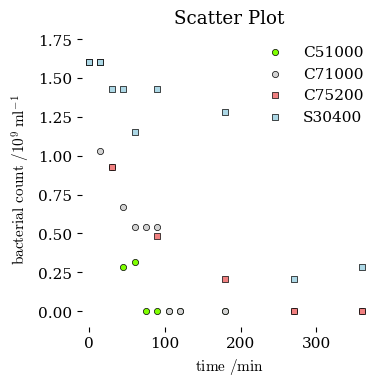

In [70]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# add four scatter plots to that 'ax' object

x = x51; y = y51
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C51000") 

x = x71; y = y71
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C71000") 

x = x75; y = y75
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C75200") 

x = xSS; y = ySS
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "S30400") 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Scatter Plot",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines1.pdf")
plt.show()

### A Bit of Dithering

Because of the low precision of the data we see that many of the points are obscuring others. In the code below I copied that from above and changed it by adding small offsets to the data points. One should definitely inform the reader of this fact - fortunately a casual inspection of the code will reveal exactly what was done. The code can often be the only documentation you need. 

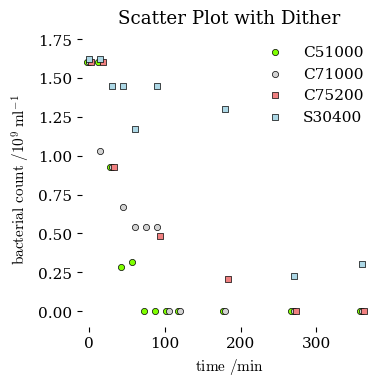

In [71]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis

# add four scatter plots to that 'ax' object

x = x51-dx; y = y51
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C51000") 

x = x71; y = y71
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C71000") 

x = x75+dx; y = y75
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "C75200") 

x = xSS; y = ySS+dy
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4, label = "S30400") 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Scatter Plot with Dither",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines2.pdf")
plt.show()

### The Right Way

The code below will plot the data the way I prefer -- with straight line connecting the points. No one will assume that this was an attempt to fit a mathematical model to the data. the lines help the reader follow the ternds without misleading anyone as to their purpose. Here we use the `ax.plot()` method built into the `ax` object.

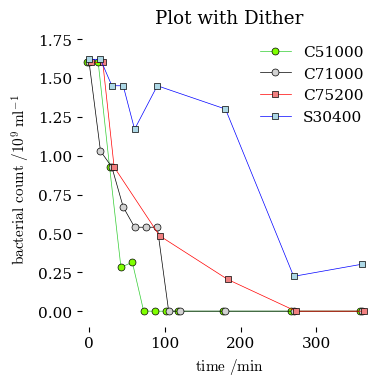

In [72]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis

# add four scatter plots to that 'ax' object

x = x51-dx; y = y51
ax.plot(x, y, marker = "o", markersize = 5, 
    color = "limegreen", markerfacecolor = "chartreuse", markeredgecolor = "black", 
    linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C51000") 

x = x71; y = y71
ax.plot(x, y, marker = "o", markersize = 5, 
    color = "black", markerfacecolor = "lightgray", markeredgecolor = "black", 
    linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C71000") 

x = x75+dx; y = y75
ax.plot(x, y, marker = "s", markersize = 5, 
    color = "red", markerfacecolor = "lightcoral", markeredgecolor = "black", 
    linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C75200") 

x = xSS; y = ySS+dy
ax.plot(x, y, marker = "s", markersize = 5, 
    color = "blue", markerfacecolor = "lightblue", markeredgecolor = "black", 
    linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "S30400") 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Plot with Dither",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines3.pdf")
plt.show()

## Plotting with Splines

Just say no. But, to show the versatility of plotting using *Python* lets do some bad things and have fun. 

Splines are no better than hand drawing a curved line through your data. However there are those who still stand by them. Consider the contribution below that describes using splines to create line fits in data sets meant to predict organ rejection in transplant patients. Obviously, like many things in life, this data has many confounding factors that make deriving a mathematical model difficult. So why not just throw a spline through the cloud of points and then *only print the spline* as the data analysis tool. Now doctors can make decisions based on that plot, which has no underlying theoretical rigour. I told you that bad data analysis can kill more people than bad pilots.

"Cubic splines to model relationships between continuous variables and outcomes: a guide for clinicians." J. Gauthier, Q.V. Wu, T.A. Gooley, *Bone Marrow Transplant*, **2020**, *55*, 675–680. https://doi.org/10.1038/s41409-019-0679-x

Look at the date. These researchers were advocating using a spline to fit data and guide decisions in medical treatment in 2020, when machine learning tools were already commonplace for analyzing these complex systems and teasing out the most important variables. When one only has a hammer the whole world looks like a nail. Being aware of the modern tools of data science will give you science superpowers. This presentation will show you none of them. Go exploring.

### The Simple Cubic Spline

One common option for curve fitting in a spreadsheet is the "cubic spline." Don't touch that button! If we're going to do something bad, lets at least do it right by using code that can be easily inspected rather than a radio-button in a GUI that you will forget you ever flipped 24 hours from now. Code will allow you to quickly repeat what you did without having to seach through menus looking for that thing you clicked on yesterday.

The code below will use an interpolation tool fron the *SciPy* library, `scipy.interpolate.CubicSpline()`, which will generate a cubic spline function from the $x$ and $y$ data. We can then calculate the value of this function over a smooth continuum of many points along the range of the x-axis and plot the spline. We will use `ax.scatter()` to plot the points and `ax.plot()` to plot the line.

Observe that this spline is "wilder" than the smooth line spline used by Excel. There are other spline generators available to *Python*, perhaps Excel uses one of those.

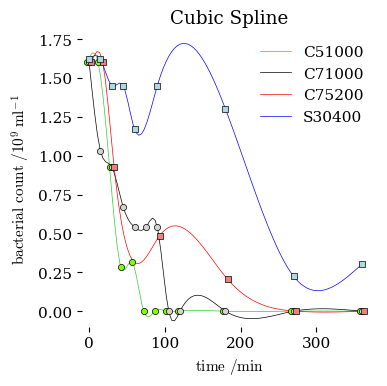

In [73]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis

# add four scatter plots and four splines to that 'ax' object

x = x51-dx; y = y51
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.CubicSpline(x, y, bc_type="natural")
ax.plot(xs, spline(xs), marker = None, 
        color = "limegreen", linewidth=0.5, zorder = 0, label = "C51000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x71; y = y71
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.CubicSpline(x, y, bc_type="natural")
ax.plot(xs, spline(xs), marker = None, 
        color = "black", linewidth=0.5, zorder = 0, label = "C71000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x75+dx; y = y75
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.CubicSpline(x, y, bc_type="natural")
ax.plot(xs, spline(xs), marker = None, 
        color = "red", linewidth=0.5, zorder = 0, label = "C75200")
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = xSS; y = ySS+dy
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.CubicSpline(x, y, bc_type="natural")
ax.plot(xs, spline(xs), marker = None, 
        color = "blue", linewidth=0.5, zorder = 0, label = "S30400")
ax.scatter(xSS, ySS+dy, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Cubic Spline",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines4.pdf")
plt.show()

### Spline with Akima1DInterpolator

There are more sophisticated spline tools available. The code below uses the `scipy.interpolate.Akima1DInterpolator()` tool to create the spline function. this has "signal dampening" features that tame the wild swings, but it is no more suitable than the basic spline for data interpreatation.

Change the `method = "akima"` to `"makima"` to apply the "modified Akima spline." Its slightly different and equally useless.

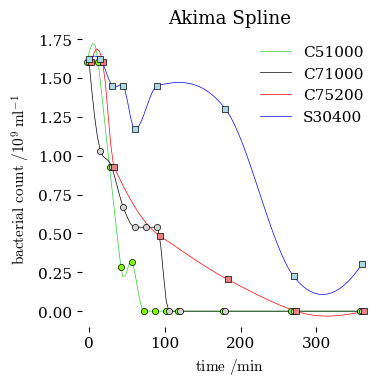

In [74]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis

# add four scatter plots and four splines to that 'ax' object

x = x51-dx; y = y51
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.Akima1DInterpolator(x, y, method="akima")
ax.plot(xs, spline(xs), marker = None, 
        color = "limegreen", linewidth=0.5, zorder = 0, label = "C51000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x71; y = y71
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.Akima1DInterpolator(x, y, method="akima")
ax.plot(xs, spline(xs), marker = None, 
        color = "black", linewidth=0.5, zorder = 0, label = "C71000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x75+dx; y = y75
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.Akima1DInterpolator(x, y, method="akima")
ax.plot(xs, spline(xs), marker = None, 
        color = "red", linewidth=0.5, zorder = 0, label = "C75200")
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = xSS; y = ySS+dy
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.Akima1DInterpolator(x, y, method="akima")
ax.plot(xs, spline(xs), marker = None, 
        color = "blue", linewidth=0.5, zorder = 0, label = "S30400")
ax.scatter(xSS, ySS+dy, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Akima Spline",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines5.pdf")
plt.show()

### Spline with PchipInterpolator
Lets try this one. How does it compare?

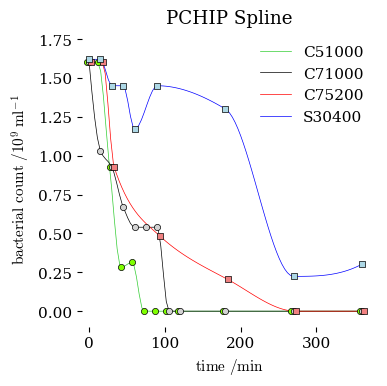

In [75]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis

# add four scatter plots and four splines to that 'ax' object

x = x51-dx; y = y51
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.PchipInterpolator(x, y)
ax.plot(xs, spline(xs), marker = None, 
        color = "limegreen", linewidth=0.5, zorder = 0, label = "C51000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x71; y = y71
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.PchipInterpolator(x, y)
ax.plot(xs, spline(xs), marker = None, 
        color = "black", linewidth=0.5, zorder = 0, label = "C71000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x75+dx; y = y75
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.PchipInterpolator(x, y)
ax.plot(xs, spline(xs), marker = None, 
        color = "red", linewidth=0.5, zorder = 0, label = "C75200")
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = xSS; y = ySS+dy
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.PchipInterpolator(x, y)
ax.plot(xs, spline(xs), marker = None, 
        color = "blue", linewidth=0.5, zorder = 0, label = "S30400")
ax.scatter(xSS, ySS+dy, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "PCHIP Spline",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines6.pdf")
plt.show()

## Smoothing Splines

Having the line pass through each point helps the eye find all the data points in the series on the plot. That is why we use the straight line "connect-the-dot" style in plots that have no mathematical model that can be applied. Smooth splines that are forecd to pass through each point give strange artifacts like the wavy lines we have seen above.

Smoothing spline has some use, though. A smoothing spline allows the line to try to make the least bends and curves yet adhere to the trend of the data. they are used in photogrpahy algoriths to smooth noise out of a photograph. Crank it up to the max to remove those crowsfeet around your eyes if you don't mind that "uncanny valley" look in your portraits.

We can use smoothing splines in *Python* as well. 

### scipy.interpolate.make_smoothing_spline

Consider the code below. Change the `smooth_factor` variable and see what happens. We have a smoother curve but, with scattered data like this, we still see artifacts such as excursions into impossible negative values for bacteria counts.

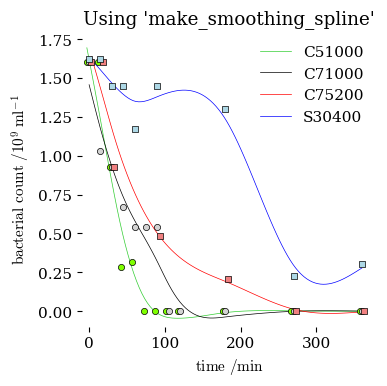

In [76]:
# create a figure (fig) of given size that contains a plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

dx = 3     # shift for dithering the x axis
dy = 0.02   # shift for dithering the y axis
smooth_factor = 1E4

# add four scatter plots and four splines to that 'ax' object

x = x51-dx; y = y51
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.make_smoothing_spline(x, y, lam = smooth_factor)
ax.plot(xs, spline(xs), marker = None, 
        color = "limegreen", linewidth=0.5, zorder = 0, label = "C51000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "chartreuse", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x71; y = y71
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.make_smoothing_spline(x, y, lam = smooth_factor)
ax.plot(xs, spline(xs), marker = None, 
        color = "black", linewidth=0.5, zorder = 0, label = "C71000")
ax.scatter(x, y, marker = "o", s = 20, 
        facecolor = "lightgray", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = x75+dx; y = y75
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.make_smoothing_spline(x, y, lam = smooth_factor)
ax.plot(xs, spline(xs), marker = None, 
        color = "red", linewidth=0.5, zorder = 0, label = "C75200")
ax.scatter(x, y, marker = "s", s = 20, 
        facecolor = "lightcoral", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

x = xSS; y = ySS+dy
xs = np.linspace(np.min(x), np.max(x), 100) 
spline = scipy.interpolate.make_smoothing_spline(x, y, lam = smooth_factor)
ax.plot(xs, spline(xs), marker = None, 
        color = "blue", linewidth=0.5, zorder = 0, label = "S30400")
ax.scatter(xSS, ySS+dy, marker = "s", s = 20, 
        facecolor = "lightblue", edgecolors = "black", 
        linewidths=0.5, zorder = 4) 

ax.legend(loc="upper right")

# Settings for plot

plt.rcdefaults()
plt.style.use(location_styles + "tufte.mplstyle")

ax.set(
        title = "Using 'make_smoothing_spline'",       
        ylabel=r"$\text{bacterial count}\ /10^9\;\text{ml}^{-1}$", 
        xlabel=r"$\text{time}\ /\text{min}$",                
        xlim=[-10, 380],                  
        ylim=[-0.1,1.8]
       )

plt.savefig("plots/splines7.pdf")
plt.show()

## Conclusion

I hope that you will agree with me that splines are generally useless. However, I do use splines from time to time. But I use them wehn interpolating between points in dense noiseless data, usually when reproducing a curve from a plot in older literature. Those of you taking Physical Organic Chemistry will see an example when we are using acidity function data for mixtures of sulphuric acid that was published in 1955.

If you must add non-informative lines to you plot for some reason, use the "connect-the-dots" straight lines. You readers will not confuse them for a fitted model.

Another approach would be to derive a mathematical model that explains the effect and then use that model to determine the parameters most responsible for cell death. Is it copper content, surface roughness, something else that is most important? Then use this information to make better antomicrobial surfaces.

Next we will switch gears and explore how *Python* calculations can keep track of our experimental uncertainties for us.

### 